# **Sine Wave**

$$
s(t)=A\sin(2\pi f t+\varphi)
$$

---

In [87]:
import numpy as np
from scipy.io.wavfile import write
from IPython.display import Audio

import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline

In [115]:
sr  = 44100   # sample rate
dr  = 1       # duration
fq  = 800     # frequency in Hz
amp = 0.5     # amplitude
phs = 0       # phase

timev  = np.linspace(0, dr, dr*sr)           # creating a time vector
signal = amp*np.sin(2*np.pi*fq*timev+phs)    # generating a signal

sig_fft  = np.fft.fft(signal)                # fast fourier transfer
sig_fftn = np.abs(sig_fft) / sr*2            # normalizing values for plot

---

#### **Plotting the signal**

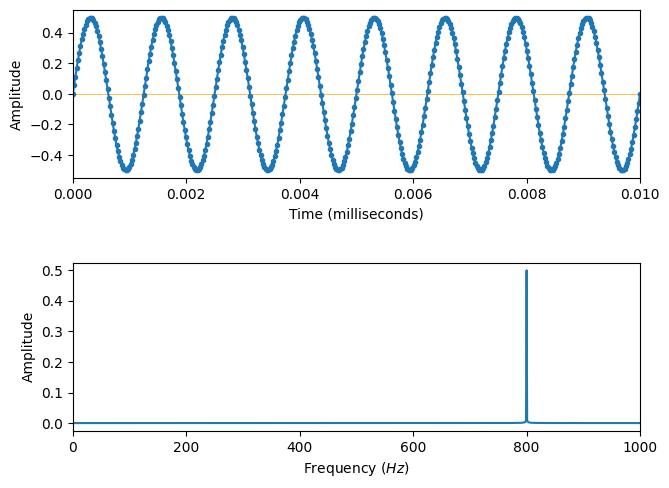

In [116]:
fig, [ax1, ax2] = plt.subplots(nrows=2, ncols=1)
fig.tight_layout(h_pad=4)

# ploting wave form
ax1.hlines(y=0, xmin=0, xmax=0.01, linewidth= 0.5, color='orange')
ax1.plot(timev, signal, '.-')
ax1.set_xlabel('Time (milliseconds)')
ax1.set_ylabel('Amplitude')
ax1.set_xlim(0, 0.01)

# ploting frequency
ax2.plot(sig_fftn)
ax2.set_xlabel('Frequency ($Hz$)')
ax2.set_ylabel('Amplitude')
ax2.set_xlim(0, 1000)

plt.show()

---

#### **Creating an audio file**

In [90]:
sin_sound = np.int16(signal*32767)       # converting values into 16 bit intengers

write('sin_sound.wav', 44100, sin_sound)
Audio(data='sin_sound.wav')